In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
####import Basemap
####from plotting_topo import plot_topo
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [2]:
derecho911_df = pd.read_csv('../data/911_Phone_Calls_Derecho_050320_050420.csv')
tornado911_df = pd.read_csv('../data/911_Phone_Calls_Tornado_030320.csv')
derecho_incidents_df = pd.read_csv('../data/Computer_Aided_Dispatch_Data_Derecho_Incidents 050320_050420.csv', skiprows=3)
tornado_incidents_df = pd.read_csv('../data/Computer_Aided_Dispatch_Data_Tornado_Incidents_030320.csv',  skiprows=3)
single_family_housing_df = pd.read_csv('../data/2017_single_family_final_with_sqft.txt')


In [3]:
BBox = ((derecho911_df['ALI Latitude'].min(), derecho911_df['ALI Latitude'].max(), 
         derecho911_df['ALI Longitude'].min(), derecho911_df['ALI Longitude'].max()))
BBox

(35.620058, 36.499779, -87.229171, -86.49355899999999)

In [8]:
derecho911_df.dtypes

Seizure DateTime       object
CallTypeId             object
ALI Latitude          float64
ALI Longitude         float64
Cell Tower Address     object
dtype: object

In [4]:
nash_m = plt.imread('C:/Users/Natalia/Documents/NSS/class_projects/metro-e911-project-the-department-of-coffee-and-bagels/data/nashville_map.png')

#### https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

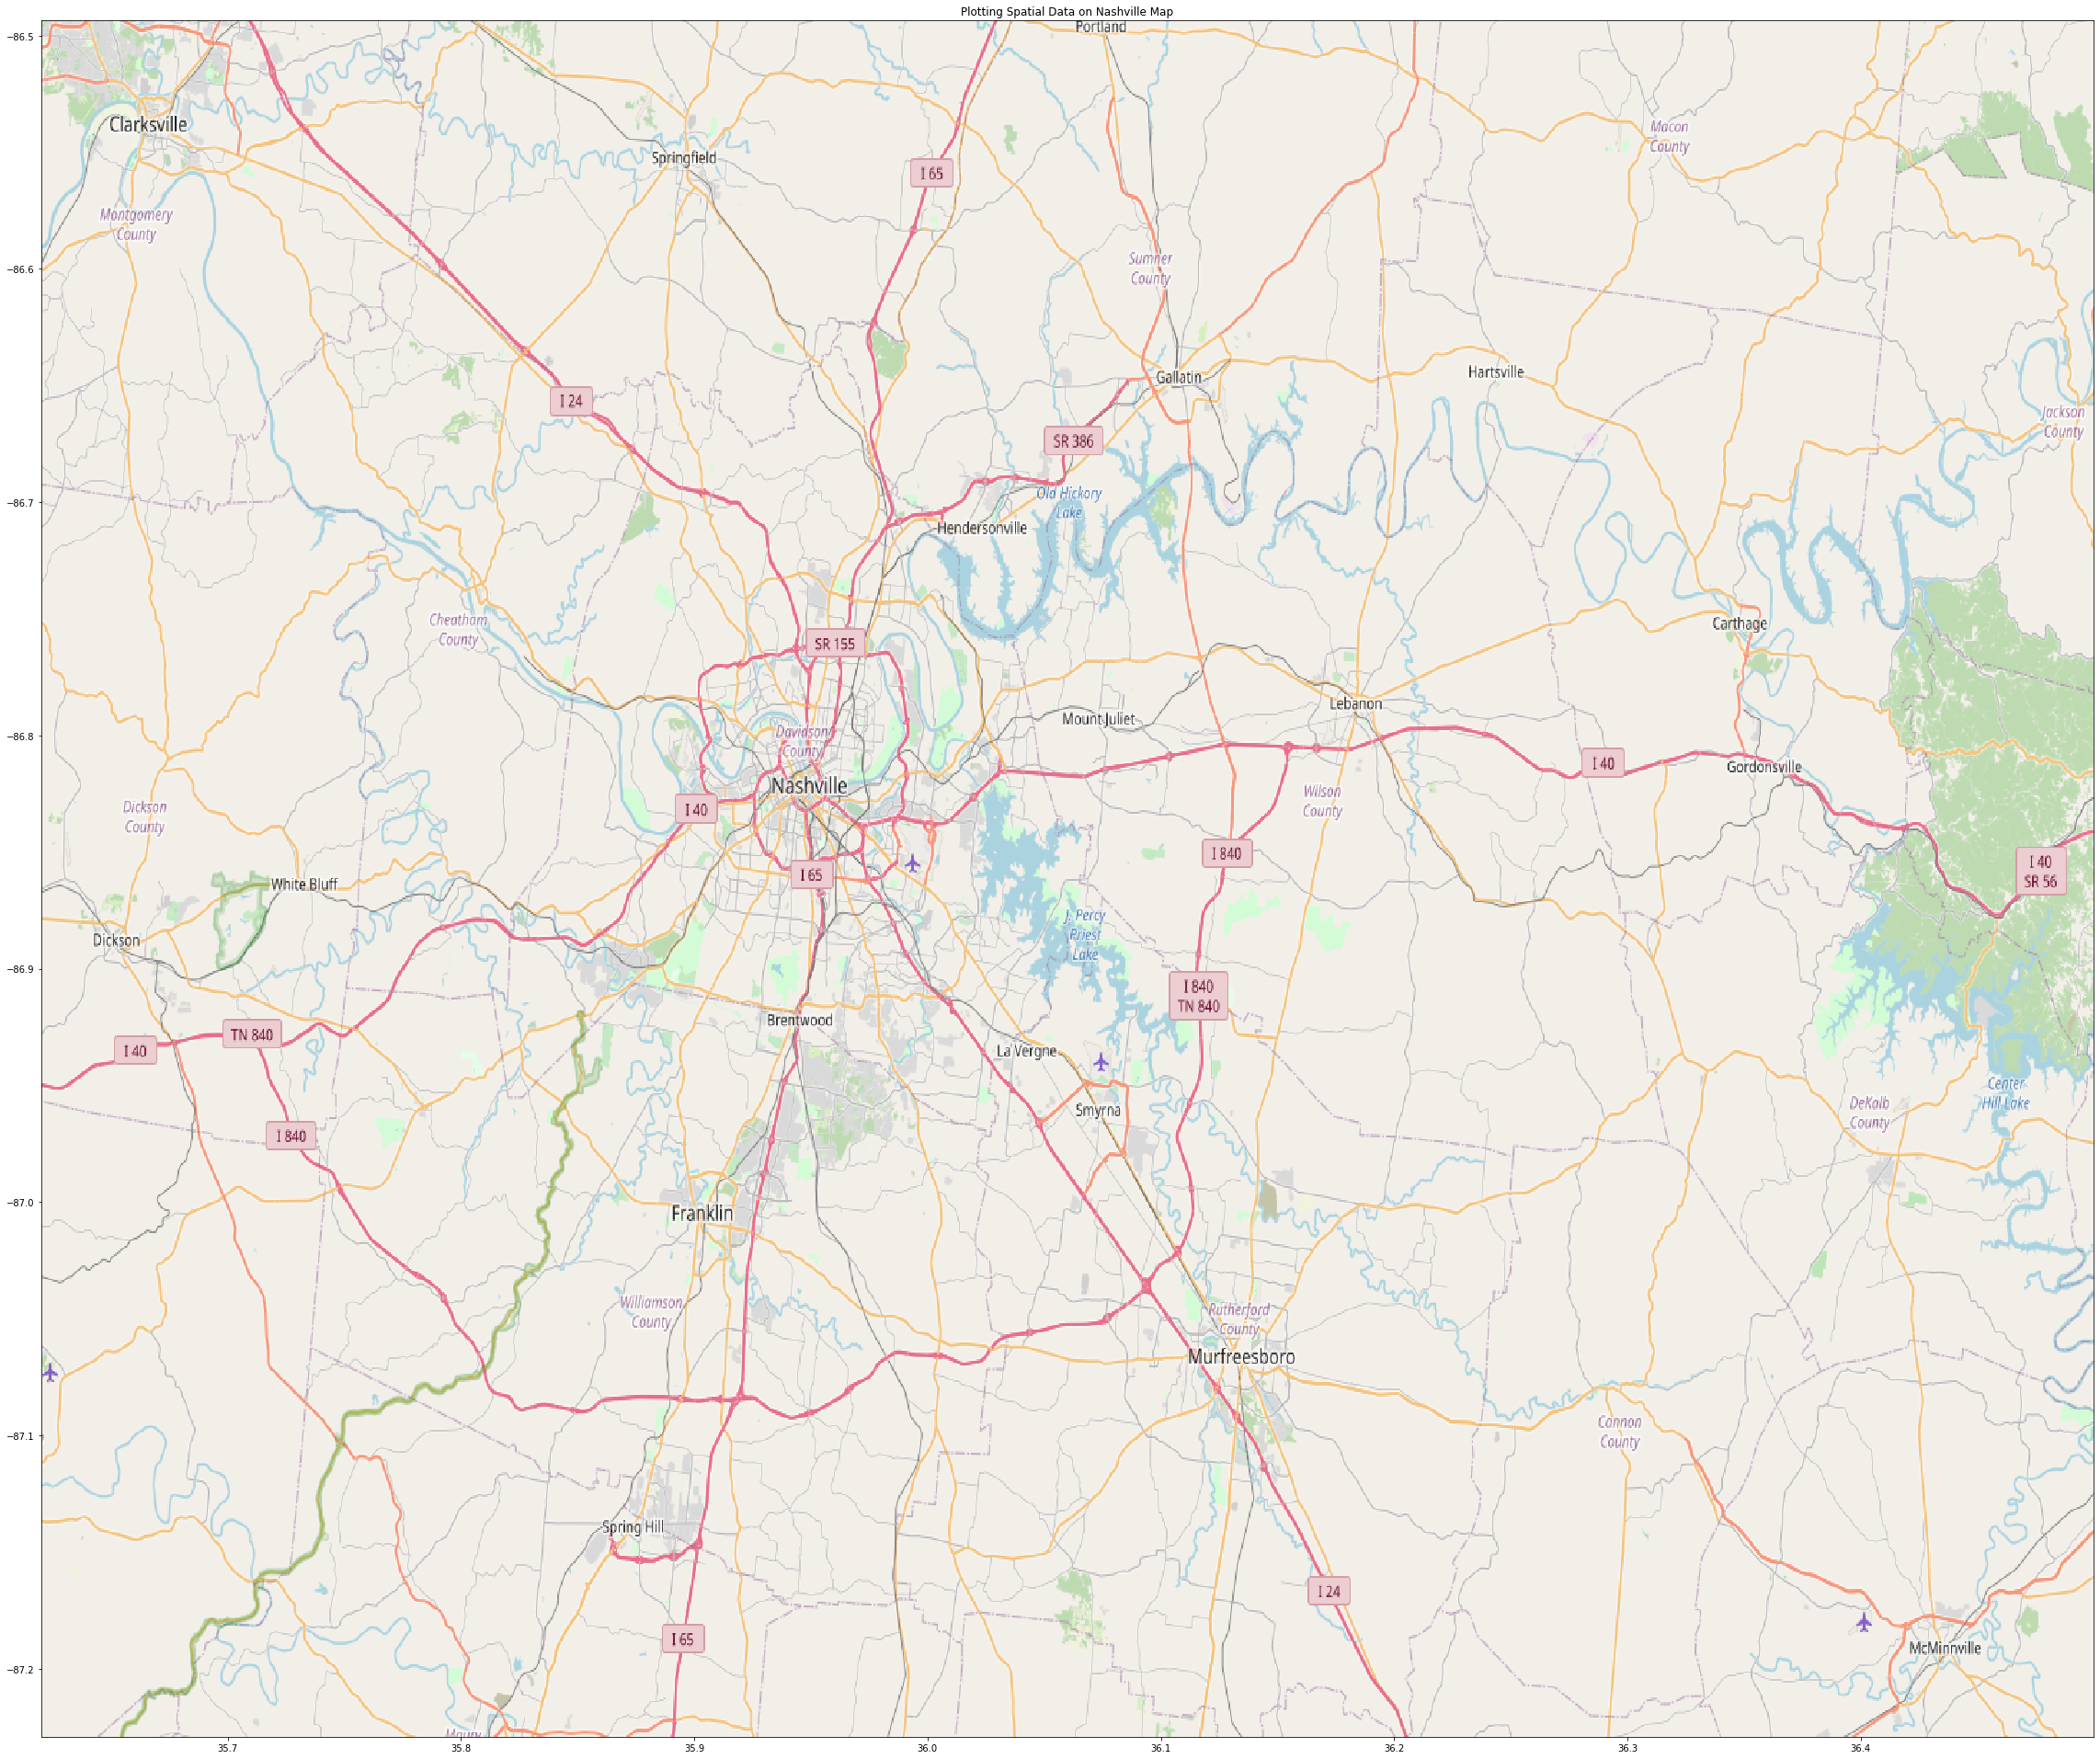

In [11]:
fig, ax = plt.subplots(figsize = (40,40))

ax.scatter(derecho911_df['ALI Longitude'], derecho911_df['ALI Latitude'], zorder=1, alpha= 0.8, c='b', s=10)

ax.set_title('Plotting Spatial Data on Nashville Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(nash_m, zorder=0, extent = BBox, aspect= 'equal')

In [6]:
lonmin, lonmax = -87.229171, -86.49355899999999
latmin, latmax = 35.620058, 36.499779

AttributeError: 'Line2D' object has no property 'column'

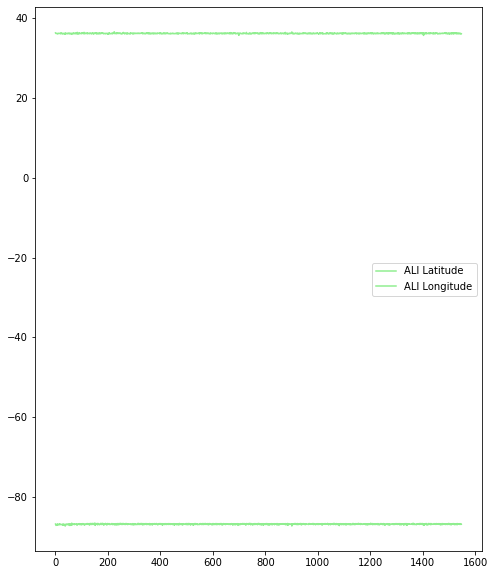

In [7]:
ax = derecho911_df.plot(figsize = (8, 10), color = 'lightgreen')
derecho911_df.plot( ax = ax, column = 'Seizure DateTime');
plt.show();

In [ ]:
fig = plt.figure(figsize=(10,6))
m = Basemap(projection='merc', resolution="c", llcrnrlon=lonmin, llcrnrlat=latmin, urcrnrlon=lonmax, urcrnrlat=latmax)

In [ ]:
colors = ['C0','C1','C3','C2','C4','C5','C6','C7'] #default colors from Python (can be automated if the order is not important)
datafiles = pd.read_csv('../data/911_Phone_Calls_Derecho_050320_050420.csv') #to read individual data files containing the coordinates of the track for each typhoon
for jj in range(8):
    dff = pd.read_csv(datafiles[jj],sep='\s+', dtype={'time': object}) #read data file and time as string
    year = datafiles[jj].split("/")[1].split("_")[1].split("-")[0] #extract year information from the filename
    track_name = datafiles[jj].split("/")[1].split("(")[1].split(")")[0] #extract track information from the filename
    track_name = track_name.capitalize()

    ## extract lat and lon info from pandas data frame and convert to map scale
    lons = dff['ALI Latitude'].values
    lats = dff['ALI Longitude'].values
    x, y = m(lons, lats)

    ## plot the track 
    m.plot(x, y,'o-',color=colors[jj],ms=4, zorder=4,label=f"TRACK {jj} ({year})")
    plt.show()